In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/mathys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fname = "Sentinel1.csv"

In [3]:
df_sent1 = pd.read_csv(fname)
df_sent1.head()

,system:index,20171003CR,20171003VH,20171003VH_asm,20171003VH_contras,20171003VH_corr,20171003VH_dent,20171003VH_diss,20171003VH_dvar,20171003VH_ent,...,20180224VV_imcorr2,20180224VV_inertia,20180224VV_prom,20180224VV_savg,20180224VV_sent,20180224VV_shade,20180224VV_svar,20180224VV_var,Did_you_us,.geo
0,00000000000000000006_0,0.535732,-17.718518,0.244792,0.625000,0.159201,0.519860,0.625000,0.187500,1.498562,...,0.661353,0.625000,1.449580,-24.291667,1.047365,0.020255,0.871528,0.374132,Y,NaN
1,00000000000000000006_1,0.591489,-16.473634,0.221354,0.750000,0.069915,0.779791,0.625000,0.312500,1.661230,...,0.869709,2.062500,20.912290,-25.354167,1.386859,-1.213252,3.123264,1.296441,Y,NaN
2,00000000000000000006_2,0.567928,-17.390391,0.156250,1.208333,0.159235,0.790692,0.875000,0.364583,1.935601,...,0.809761,1.395833,4.659975,-23.562500,1.123107,-0.059896,1.428819,0.706163,Y,NaN
3,00000000000000000006_3,0.529135,-18.165520,0.300347,0.770833,-0.050000,0.693147,0.562500,0.428819,1.361235,...,0.793481,1.875000,9.969329,-21.875000,1.300216,0.833333,2.173611,1.012153,Y,NaN
4,00000000000000000006_4,0.528997,-18.192079,0.752604,0.145833,0.168831,0.365864,0.145833,0.116319,0.466948,...,0.714586,1.687500,5.647823,-20.104167,1.220651,-1.175058,1.637153,0.831163,Y,NaN


In [32]:
image_type = pd.Series([name[11:] for name in list(df_sent1.columns[1:-2])]).unique()[1:]

print("Image type :")
for type in image_type:
    print(f'\t- {type}')

Image type :
	- asm
	- contras
	- corr
	- dent
	- diss
	- dvar
	- ent
	- idm
	- imcorr1
	- imcorr2
	- inertia
	- prom
	- savg
	- sent
	- shade
	- svar
	- var


# Satellite Image Metrics Explained

1. **ASM (Amplitude Scattering Model)**
   - **Definition**: Refers to a model used to estimate the backscattering coefficient based on the amplitude of the received signal.
   - **Application**: Helps characterize surface properties and types of scattering mechanisms in the observed area, often used in vegetation studies and surface classification.

2. **Contras (Contrast)**
   - **Definition**: Measures the contrast between different areas in the radar image, often highlighting features based on backscatter differences.
   - **Application**: Useful for identifying edges, textures, and boundaries between different land cover types, such as forests and open fields.

3. **Corr (Correlation)**
   - **Definition**: Refers to the statistical correlation of backscatter values across multiple images or radar acquisitions.
   - **Application**: Used to assess the stability or changes in the surface over time, indicating dynamic processes like vegetation growth or land use change.

4. **Dent (Dente)**
   - **Definition**: Likely refers to a measure related to the texture or roughness of the surface, capturing the variability of backscatter.
   - **Application**: Helps analyze surface characteristics, especially in urban areas or rugged terrain.

5. **Diss (Dissimilarity)**
   - **Definition**: A metric that quantifies the dissimilarity between different backscatter values or images.
   - **Application**: Useful for identifying changes in land cover or surface conditions, indicating disturbances or variations.

6. **Dvar (Diversity)**
   - **Definition**: Refers to the diversity of backscatter values across a given area.
   - **Application**: Indicates the variability in surface types or conditions, often applied in ecological studies to assess habitat diversity.

7. **Ent (Entropy)**
   - **Definition**: A measure of the randomness or complexity of the backscatter values in an image.
   - **Application**: High entropy values can indicate heterogeneous landscapes, while low values may suggest homogeneity, aiding in land cover classification.

8. **IDM (Intensity Distribution Measure)**
   - **Definition**: A metric that quantifies the distribution of backscatter intensity values across an image.
   - **Application**: Helps in understanding the distribution patterns, which can be correlated with vegetation types or land cover characteristics.

9. **Imcorr1 & Imcorr2 (Image Correction)**
   - **Definition**: Refers to images that have undergone specific correction processes to minimize distortions and improve quality.
   - **Application**: Often used for removing effects from terrain, atmospheric conditions, or sensor-specific biases to enhance the accuracy of subsequent analyses.

10. **Inertia**
    - **Definition**: A measure related to the distribution of backscatter intensities, often associated with spatial variance.
    - **Application**: Can indicate structural characteristics of vegetation or surfaces, contributing to land cover classification.

11. **Prom (Prominence)**
    - **Definition**: Likely refers to the prominence of certain features based on backscatter intensity.
    - **Application**: Useful for highlighting significant structures or features in an image, such as roads or buildings.

12. **Savg (Spatial Average)**
    - **Definition**: The average backscatter value over a specified spatial area.
    - **Application**: Helps summarize radar backscatter for regions of interest, aiding in overall vegetation or surface analysis.

13. **Sent (Sentinel Specific Measures)**
    - **Definition**: May refer to various metrics or characteristics specifically derived from Sentinel satellite data.
    - **Application**: These could include unique processing outputs tailored for applications related to Sentinel-1 or Sentinel-2 data.

14. **Shade**
    - **Definition**: Refers to the shadowing effects in the radar image due to terrain or surface features.
    - **Application**: Important for understanding topography and its influence on radar backscatter, particularly in hilly or mountainous areas.

15. **Svar (Spatial Variance)**
    - **Definition**: A measure of the variance in backscatter values across a specified area.
    - **Application**: Indicates the variability of surface types or conditions, aiding in classification and analysis.

16. **Var (Variance)**
    - **Definition**: The statistical measure of how much the backscatter values vary.
    - **Application**: High variance indicates a heterogeneous area, while low variance suggests homogeneity. This is useful for land cover classification.


# VH & VV Analysis

The use of remote sensing data, particularly those derived from the VV (Vertical-Vertical) and VH (Vertical-Horizontal) bands of Sentinel-1 satellites, can provide valuable information for the study of vegetation.

About the **VV** and **VR** :

 - **Higher VV Values**: Healthy, dense vegetation tends to reflect more radar signals in the vertical polarization (VV) due to multiple scattering events within the foliage.

 - **Moderate VH Values**: The horizontal polarization (VH) may also be significant but typically less than the VV values in dense, healthy vegetation.


In [4]:
dates = df_sent1.columns[1:-3]

cols_vv = [col for col in dates if ('VV' in col)and(len(col)==10)]
cols_vh = [col for col in dates if ('VH' in col)and(len(col)==10)]

/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seabor

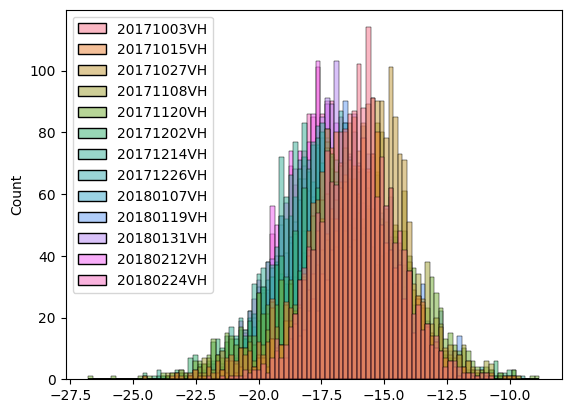

In [5]:
sns.histplot(df_sent1[cols_vh])
plt.show()

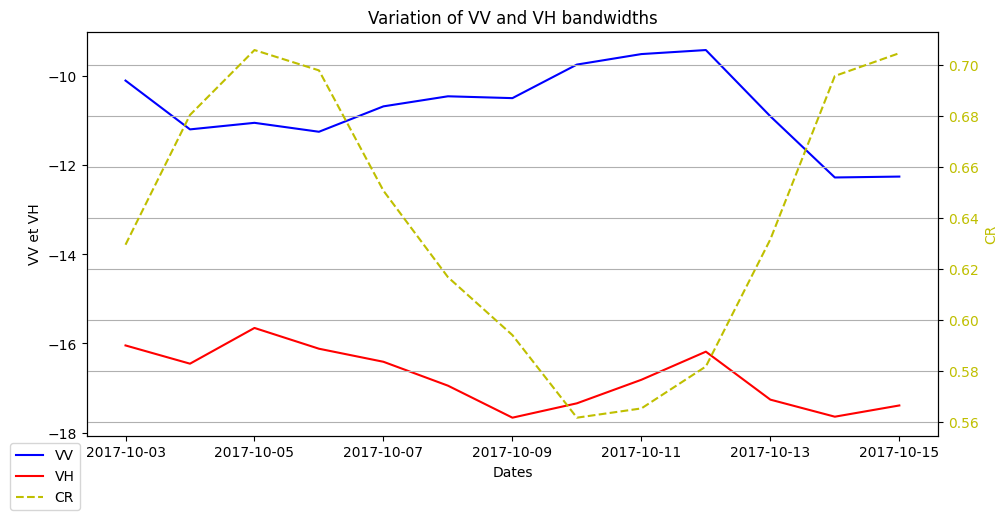

In [57]:
mean_vv = df_sent1[cols_vv].mean()
mean_vh = df_sent1[cols_vh].mean()
mean_cr =  mean_vv.values/mean_vh.values

dates_format = pd.to_datetime([col[:-2] for col in cols_vv], format='%Y%m%d') # We can take any (vv/vh) for the date since it is the same timestamp
dates = pd.date_range(start=dates_format[0], periods=len(mean_vv), freq='D')

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(dates, mean_vv.values, label='VV', color='b')
ax1.plot(dates, mean_vh.values, label='VH', color='r')
ax1.set_xlabel('Dates')
ax1.set_ylabel('VV et VH', color='k')
ax1.tick_params(axis='y', labelcolor='k') 

ax2 = ax1.twinx()
ax2.plot(dates, mean_cr, label='CR', color='y', linestyle='--')
ax2.set_ylabel('CR', color='y')
ax2.tick_params(axis='y', labelcolor='y') 

fig.legend(bbox_to_anchor=(0.0, 0), bbox_transform=ax1.transAxes)
plt.title('Variation of VV and VH bandwidths')
plt.xlabel('Date')
plt.ylabel('CR')
plt.grid(True)

plt.tight_layout()

plt.show()

The intensity cross-ratio **CR** $\left(\frac{VV}{VH}\right)$ is used for differentiating vegetation types : 
- **Increasing CR**: May indicate improving health or recovery, possibly due to favorable environmental conditions or management practices.
- **Decreasing CR**: Suggests declining health or increased stress, alerting managers or researchers to potential problems.

A *rising CR* might indicate new growth in spring as vegetation becomes denser.While a *declining CR* during dry periods could signal stress in the vegetation. 